<a href="https://colab.research.google.com/github/jayswal-shruti/Recognition-Of-Object/blob/main/Recognition_of_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np



LOADING AND SPILITTING THE DATA

In [ ]:
import keras


In [ ]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.cifar10.load_data()



170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Trainig Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Trainig Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(y_train[0])

[6]


In [ ]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


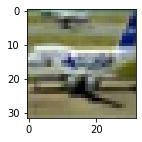

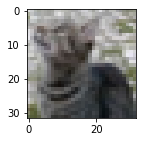

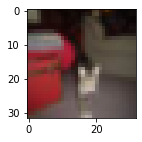

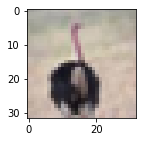

In [ ]:
for i in range(332,336):
  plt.subplots(figsize=(2,2))
  img = X_train[i]
  plt.imshow(img)
  plt.show()

PREPROCESSING THE DATA


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test=X_test/255
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding:" , Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding: (50000, 10)


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split
model = Sequential()
#convolutional layers\n",
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
# hidden layer\n"
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer\n",
model.add(Dense(10, activation='softmax'))
# compiling \n",
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#training the model \n",
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))



Epoch 1/10
391/391 [==============================] - 509s 1s/step - loss: 1.6415 - accuracy: 0.3944 - val_loss: 1.2304 - val_accuracy: 0.5550
Epoch 2/10
391/391 [==============================] - 509s 1s/step - loss: 1.1444 - accuracy: 0.5945 - val_loss: 0.9627 - val_accuracy: 0.6600
Epoch 3/10
391/391 [==============================] - 506s 1s/step - loss: 0.9561 - accuracy: 0.6680 - val_loss: 0.8456 - val_accuracy: 0.7059
Epoch 4/10
391/391 [==============================] - 502s 1s/step - loss: 0.8437 - accuracy: 0.7069 - val_loss: 0.7912 - val_accuracy: 0.7218
Epoch 5/10
391/391 [==============================] - 503s 1s/step - loss: 0.7623 - accuracy: 0.7346 - val_loss: 0.7263 - val_accuracy: 0.7515
Epoch 6/10
391/391 [==============================] - 504s 1s/step - loss: 0.6990 - accuracy: 0.7541 - val_loss: 0.6909 - val_accuracy: 0.7597
Epoch 7/10
391/391 [==============================] - 504s 1s/step - loss: 0.6510 - accuracy: 0.7703 - val_loss: 0.6710 - val_accuracy: 0.7674

PREDICTION


In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']


class_labels = dict(zip(classes, names))

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

predictions = model.predict(batch, verbose = 1)


1/1 [==============================] - 0s 128ms/step


In [ ]:
print (predictions)


[[0.10364817 0.09716829 0.09997308 0.09804614 0.1034071  0.10024323
  0.09796688 0.09985532 0.09754345 0.10214838]
 [0.10364825 0.09716824 0.09997308 0.09804609 0.10340714 0.10024322
  0.09796683 0.0998553  0.0975434  0.10214843]
 [0.10364815 0.09716829 0.09997306 0.09804618 0.10340708 0.10024323
  0.09796689 0.09985531 0.09754342 0.10214832]
 [0.1036482  0.09716821 0.0999731  0.09804613 0.10340708 0.10024317
  0.09796686 0.09985531 0.09754345 0.10214844]
 [0.10364828 0.09716824 0.09997308 0.09804612 0.10340714 0.1002432
  0.09796683 0.09985531 0.0975434  0.10214844]
 [0.10364831 0.09716815 0.0999731  0.09804607 0.10340722 0.10024318
  0.09796679 0.09985526 0.0975434  0.10214856]
 [0.10364818 0.0971683  0.09997308 0.09804615 0.1034071  0.1002432
  0.09796689 0.09985532 0.09754341 0.10214835]
 [0.10364809 0.09716835 0.0999731  0.09804618 0.10340706 0.10024326
  0.09796689 0.09985531 0.09754347 0.10214832]
 [0.10364831 0.09716817 0.09997302 0.09804609 0.10340717 0.10024317
  0.09796686 0

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0000001
1.0
1.0
0.9999999
1.0000001
1.0000001
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)


[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION

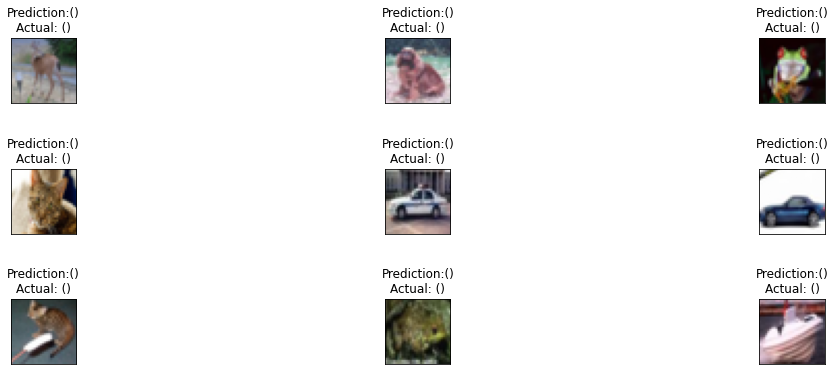

In [ ]:
fig,axs =plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i]==key:
      title = 'Prediction:()\nActual: ()'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

    #plot the image
    axs[i].imshow(img)
#show the plot
plt.show()